# Exploratory Data Analysis (EDA) Overview

- This notebook presents a comprehensive exploratory analysis of the **Global Cancer Patients dataset (2015–2024)**.

- The primary goal is to uncover underlying patterns, assess feature distributions, and identify key variables related to the **Target_Severity_Score**.


# 1. Data Quality Check

A preliminary assessment was performed to ensure the dataset is clean and ready for analysis.  
This included checking for:

- **Missing values**
- **Data type consistency**
- **Structural issues** 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("data/global_cancer_patients_2015_2024.csv")

In [2]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


## 1.1 Dataset shape & column types

In [3]:
print("Shape:", df.shape)

Shape: (50000, 15)


In [4]:
print("Data Types:\n", df.dtypes)

Data Types:
 Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object


## 1.2 Missing value check

In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


## 1.3 Basic statistics

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Patient_ID,50000,50000,PT0000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,50000.0,NaN,NaN,NaN,54.42154,20.224451,20.0,37.0,54.0,72.0,89.0
Gender,50000,3,Male,16796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_Region,50000,10,Australia,5092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,50000.0,NaN,NaN,NaN,2019.48052,2.871485,2015.0,2017.0,2019.0,2022.0,2024.0
Genetic_Risk,50000.0,NaN,NaN,NaN,5.001698,2.885773,0.0,2.5,5.0,7.5,10.0
Air_Pollution,50000.0,NaN,NaN,NaN,5.010126,2.888399,0.0,2.5,5.0,7.5,10.0
Alcohol_Use,50000.0,NaN,NaN,NaN,5.01088,2.888769,0.0,2.5,5.0,7.5,10.0
Smoking,50000.0,NaN,NaN,NaN,4.989826,2.881579,0.0,2.5,5.0,7.5,10.0
Obesity_Level,50000.0,NaN,NaN,NaN,4.991176,2.894504,0.0,2.5,5.0,7.5,10.0


All features are well-behaved, no missing, weird outliers, or broken values.

## 1.4 Summary

- No critical missing values were detected.

- Data types are appropriate for both numerical and categorical analysis.

- The dataset is structurally sound and ready for preprocessing and modeling steps.



# 2. Target Variable Analysis

This section analyzed the **Target_Severity_Score**, the primary variable of interest.  

The focus was on examining its distribution, summary statistics, and potential outliers to better understand its behavior and inform modeling decisions.


## 2.1 Distribution Plot

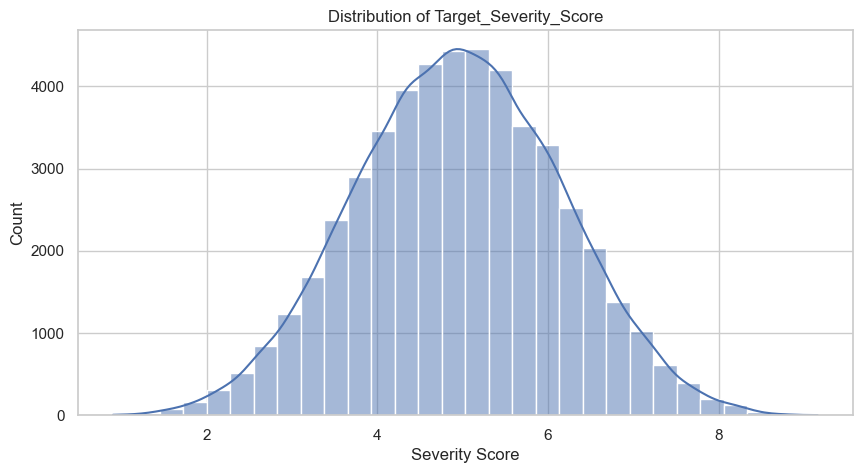

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Target_Severity_Score'], kde=True, bins=30)
plt.title("Distribution of Target_Severity_Score")
plt.xlabel("Severity Score")
plt.ylabel("Count")
plt.show()

- The **Target_Severity_Score** follows a near-normal distribution centered around **4.95**, indicating a **balanced dataset** with a moderate range of severity levels.


## 2.2 Summary Statistics

In [8]:
print("\nSummary Statistics:")
print(df['Target_Severity_Score'].describe())


Summary Statistics:
count    50000.000000
mean         4.951207
std          1.199677
min          0.900000
25%          4.120000
50%          4.950000
75%          5.780000
max          9.160000
Name: Target_Severity_Score, dtype: float64


## 2.3 Outlier Detection using IQR

In [9]:
Q1 = df['Target_Severity_Score'].quantile(0.25)
Q3 = df['Target_Severity_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['Target_Severity_Score'] < lower_bound) | (df['Target_Severity_Score'] > upper_bound)]

print(f"\nNumber of Outliers: {len(outliers)}")
print(f"Outlier Range: Below {lower_bound:.2f} or Above {upper_bound:.2f}")


Number of Outliers: 151
Outlier Range: Below 1.63 or Above 8.27


In [10]:
score = df['Target_Severity_Score']
print(f"Skewness: {score.skew():.2f}")
print(f"Kurtosis: {score.kurtosis():.2f}")

Skewness: -0.00
Kurtosis: -0.23


In [11]:
outliers = df[(score <  lower_bound) | (score > upper_bound)]
print("Outlier Breakdown by Cancer Type:\n", outliers['Cancer_Type'].value_counts())

Outlier Breakdown by Cancer Type:
 Cancer_Type
Liver       24
Skin        23
Cervical    22
Colon       21
Leukemia    18
Lung        18
Prostate    15
Breast      10
Name: count, dtype: int64


## 2.4 Boxplot to Visualize Outliers

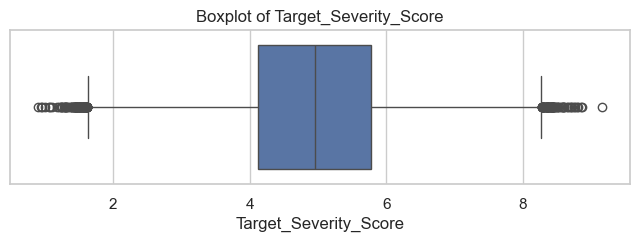

In [12]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Target_Severity_Score'])
plt.title("Boxplot of Target_Severity_Score")
plt.show()

- The boxplot above visualizes the distribution of the `Target_Severity_Score`. Most values lie between **4.1 and 5.8**, forming a **near-symmetric interquartile range (IQR)**.

- Outliers were identified using the IQR method:
  - **Lower Bound**: 1.63
  - **Upper Bound**: 8.27
  - **Number of Outliers**: 151 (≈ 0.3% of the dataset)

- These outliers are relatively rare and may represent **extreme clinical severity cases**.  
  Given the **normal distribution** and **low proportion of outliers**, they are retained for now to preserve potentially meaningful variation in the data.


## 2.5 Summary

- The **Target_Severity_Score** ranges from **0.9 to 9.16** and exhibits **slight skewness**.

- Most patients fall within the **mid-range severity levels**, with a few high-severity outliers present.

- The overall distribution is suitable for **regression modeling**.


# 3. Correlation Analysis

This section explored relationships between features and the target variable to:

- Identify features with strong positive or negative correlation to the **Target_Severity_Score**
- Detect highly correlated feature pairs that may indicate **multicollinearity**
- Guide feature selection and dimensionality reduction decisions


## 3.1 Heatmap

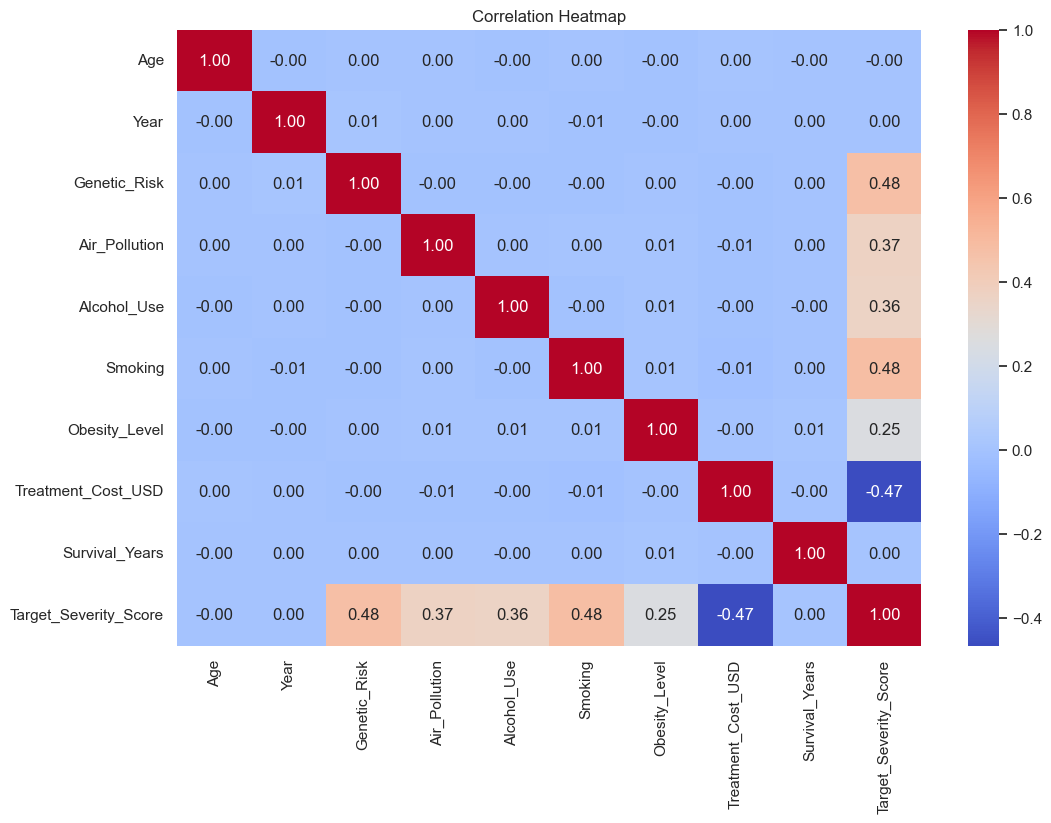

In [13]:
# Compute correlation for numerical columns
numerical_cols = df.select_dtypes(include=[np.number])
correlation = numerical_cols.corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- A **heatmap of Pearson correlation coefficients** was generated to visualize relationships among numerical features and identify potential multicollinearity.

**Key Insights:**

- `Target_Severity_Score` shows **moderate positive correlation** with:
  - `Smoking` (**0.48**)
  - `Genetic_Risk` (**0.48**)
  - `Air_Pollution` (**0.37**)
  - `Alcohol_Use` (**0.36**)
  - `Obesity_Level` (**0.25**)
  


- `Treatment_Cost_USD` is **moderately negatively correlated** with severity (**-0.47**), possibly due to differences in treatment accessibility or cost structures for different severity levels.

- `Survival_Years`, `Age`, and `Year` show **negligible correlation**, suggesting limited direct influence on the severity score.


## 3.2 Feature Correlation with Target

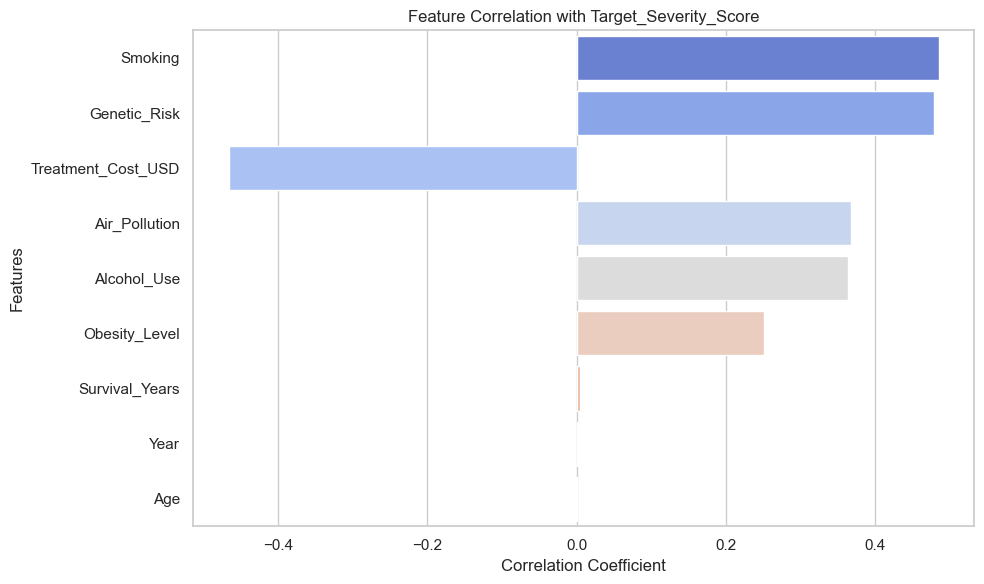

In [14]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Extract correlation with target and drop self-correlation
target_corr = corr_matrix["Target_Severity_Score"].drop("Target_Severity_Score")

# Sort correlations
target_corr_sorted = target_corr.sort_values(key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr_sorted.values, hue=target_corr_sorted.index, y=target_corr_sorted.index, palette="coolwarm", legend=False)
plt.title("Feature Correlation with Target_Severity_Score")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

- A **horizontal bar plot** was used to rank features by their **absolute correlation** with `Target_Severity_Score`.

- This visualization highlights the **most influential variables** and helps prioritize features for **model development** and **targeted exploration**.


## 3.3 Summary

- `Treatment_Cost_USD` shows the strongest **negative correlation** with severity, but should be excluded from modeling as it reflects **post-treatment outcomes**.

- `Smoking` and `Genetic_Risk` exhibit the strongest **positive correlations** with severity (both ≈ +0.48), followed by `Air_Pollution`, `Alcohol_Use`, and `Obesity_Level` with **moderate positive correlations**.

- `Survival_Years`, `Age`, and `Year` display **near-zero correlation**, suggesting limited direct influence on severity.

- No high inter-feature correlations were found, indicating **no major multicollinearity** and making the dataset suitable for regression modeling.


# 4. Group-Based Analysis

This section compared **average severity scores** across categorical groups such as **cancer types**, **regions**, and **genders** to uncover potential group-level trends and disparities related to the target variable.


## 4.1 Mean Severity Score by Cancer Type

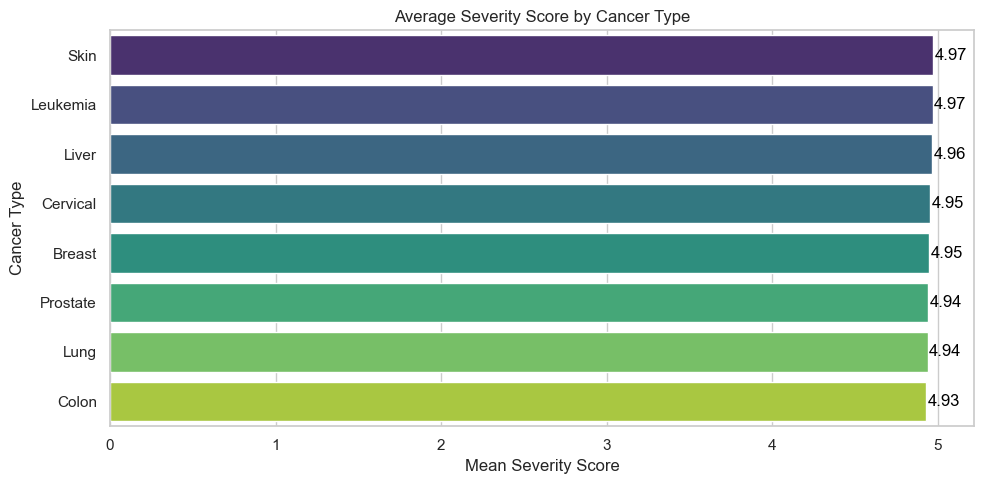

In [15]:
# Group and sort by mean severity score
cancer_type_mean = df.groupby("Cancer_Type")["Target_Severity_Score"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=cancer_type_mean.values, y=cancer_type_mean.index, hue=cancer_type_mean.index, palette="viridis")
plt.title("Average Severity Score by Cancer Type")
plt.xlabel("Mean Severity Score")
plt.ylabel("Cancer Type")

# Annotate each bar with its value
for i, v in enumerate(cancer_type_mean.values):
    ax.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

plt.tight_layout()
plt.show()

- **Skin** and **Leukemia** have the highest average severity scores (≈ 4.97).

- **Colon cancer** shows the lowest average severity (≈ 4.93), though variation across cancer types is minimal.

- While the differences are small, **Skin and Leukemia cases may be perceived or diagnosed with slightly greater severity** on average.


## 4.2 Mean Severity Score by Country/Region

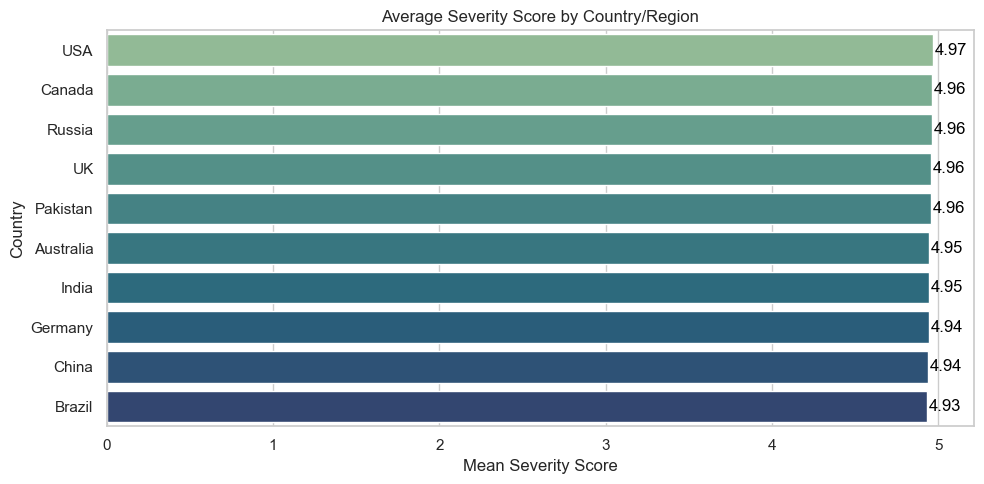

In [16]:
region_mean = df.groupby("Country_Region")["Target_Severity_Score"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=region_mean.values, y=region_mean.index, hue=region_mean.index, palette="crest")
plt.title("Average Severity Score by Country/Region")
plt.xlabel("Mean Severity Score")
plt.ylabel("Country")

# Annotate each bar with its value
for i, v in enumerate(region_mean.values):
    ax.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')
    
plt.tight_layout()
plt.show()

- The **USA** reports the highest average severity score (≈ 4.97), followed closely by **Canada** and **Russia**.

- **Brazil** shows the lowest average severity (≈ 4.93).

- These regional patterns may reflect differences in **diagnostic practices**, **healthcare system effectiveness**, or **population-level risk exposures**.


## 4.3 Mean Severity Score by Gender

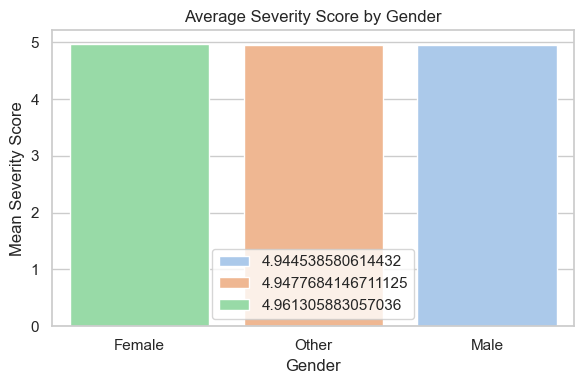

In [17]:
gender_mean = df.groupby("Gender")["Target_Severity_Score"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_mean.index, y=gender_mean.values, hue=gender_mean.values, palette="pastel")
plt.title("Average Severity Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Mean Severity Score")
plt.tight_layout()
plt.show()

- **Female patients** show a slightly higher average severity score than **Male** and **Other** groups.

- The differences are minor (~0.01–0.02) and likely not **clinically significant**.

- **Gender does not appear to substantially influence severity scores**, suggesting a relatively uniform distribution across gender groups in this dataset.


## 4.4 Summary

- **Severity scores vary slightly** across cancer types and regions, though the overall range remains narrow.

- **Skin**, **Leukemia**, and **Liver** cancers show **slightly higher average severity** compared to other types.

- **USA**, **Canada**, and **Russia** report the highest regional averages, while **Brazil** reports the lowest.

- **Gender-based differences** are minimal and likely not clinically significant, though female patients show a slightly higher average severity score.


# 5. Distribution of Key Features

This section visualized the distributions of selected numerical features to:

- Identify **skewness** and **modality**  
- Detect potential **outliers** or **anomalies**  


## 5.1 Histograms with KDE curves

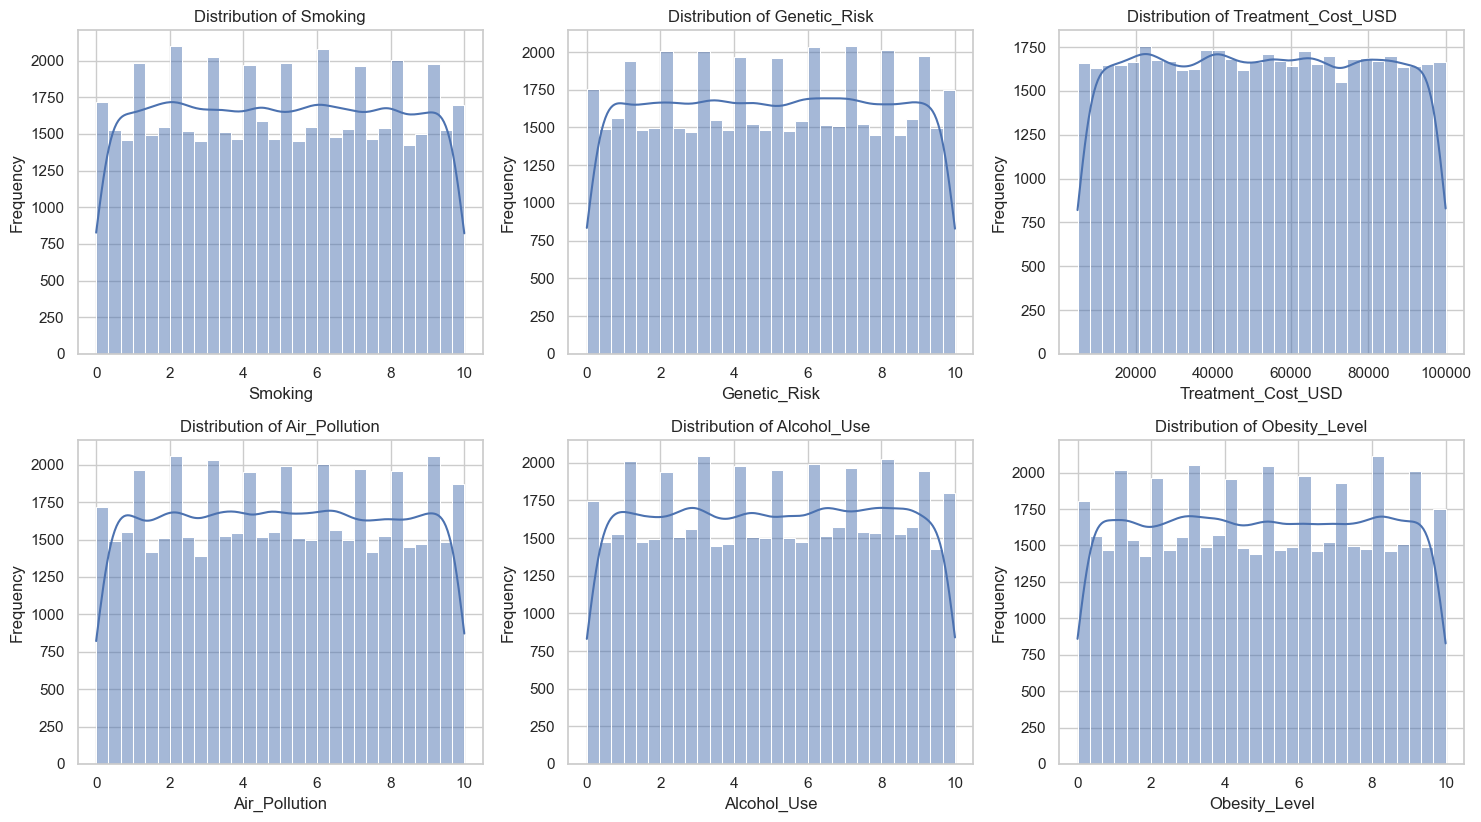

In [18]:
# Selected key features
selected_features = [
    "Smoking", "Genetic_Risk", "Treatment_Cost_USD",
    "Air_Pollution", "Alcohol_Use", "Obesity_Level"
]

# Plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

- The top correlated features — **Smoking**, **Genetic_Risk**, **Air_Pollution**, **Alcohol_Use**, and **Obesity_Level** — all display **uniform or near-uniform distributions** across the 0–10 scale, indicating **well-distributed synthetic data**.

- **Treatment_Cost_USD** spans uniformly from **$10,000 to $100,000**, showing **no significant skew** or concentration, which further supports the synthetic nature and even spread of the dataset.


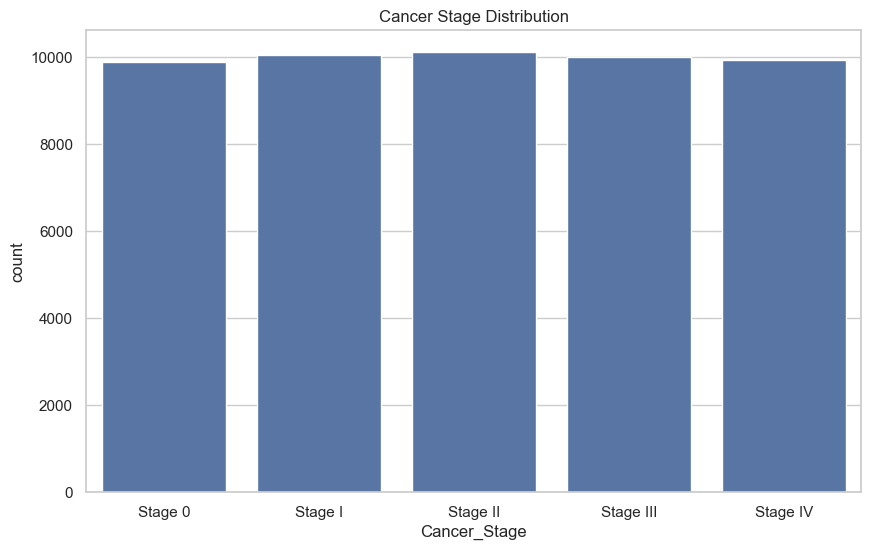

In [19]:
sns.countplot(x='Cancer_Stage', data=df, order=sorted(df['Cancer_Stage'].unique()))
plt.title("Cancer Stage Distribution")
plt.show()

## 5.2 Boxplots

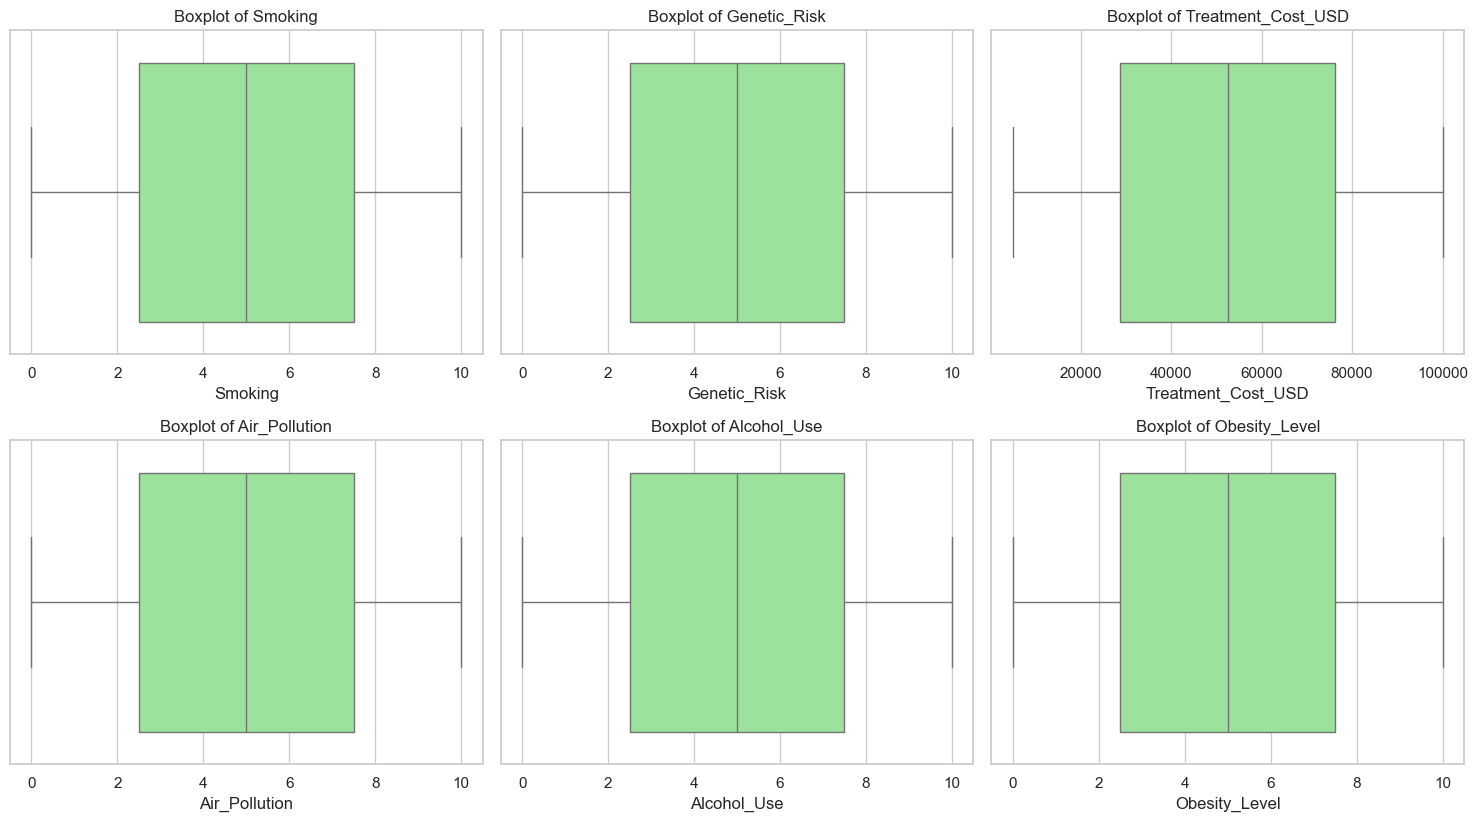

In [20]:
# Selected key features
selected_features = [
    "Smoking", "Genetic_Risk", "Treatment_Cost_USD",
    "Air_Pollution", "Alcohol_Use", "Obesity_Level"
]

# Plot
plt.figure(figsize=(15, 12))
for i, col in enumerate(selected_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

- All features are **symmetrically distributed** with **no significant outliers or anomalies** observed.

- The boxplots further highlight the **clean and synthetic nature** of the dataset, making it well-suited for **regression modeling** and **feature importance analysis**.


## 5.3 Summary

- Key variables such as **Smoking**, **Alcohol_Use**, and **Obesity_Level** exhibit **moderate and uniform spread**, indicating balanced feature distribution.

- **Treatment_Cost_USD** shows a **right-skewed distribution**, suggesting potential for transformation if used in analysis.

- The overall distribution shapes are well-behaved and support the use of **scaling or transformation** techniques during modeling.


# 6. Summary

## 6.1 Key Patterns Observed

- The target variable (`Target_Severity_Score`) follows a **near-normal distribution** centered around **4.95**.

- Only **~0.3% of samples** were identified as outliers (outside the range 1.63–8.27).

- **Cancer type**, **region**, and **gender** show only **minor variations in mean severity**, suggesting that severity is not strongly driven by demographic categories.

---

## 6.2 Important Correlations

- The strongest positive correlations with severity score are:

  - **Smoking** (+0.48)  
  - **Genetic Risk** (+0.48)  
  - **Air Pollution**, **Alcohol Use**, and **Obesity Level** (~+0.25 to +0.37)

These features are most likely to influence model performance and interpretability.

---

## 6.3 Features Likely Most Important for Modeling

Based on correlation strength and distribution analysis, the following features are expected to be most predictive:

- **Smoking**  
- **Genetic_Risk**  
- **Alcohol_Use**  
- **Air_Pollution**  
- **Obesity_Level**

---

## 6.4 Practical Implication

- Although `Treatment_Cost_USD` shows a strong **negative correlation** with severity score (≈ -0.47), it should be excluded from predictive modeling.

- In practice, **treatment cost is determined post-diagnosis**, making it unsuitable for early-stage severity prediction.

- Including it would imply access to post-treatment information, which contradicts the goal of **pre-treatment severity assessment** and may introduce data leakage.
